In [320]:
from collections import defaultdict
import random

from tqdm.notebook import tqdm

import pandas as pd
from collections import Counter

from scipy import sparse
from scipy.sparse.linalg import svds
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize

import glob
import re
import matplotlib.pyplot as plt

import math

In [415]:
english_books = glob.glob('english_books/*')

In [417]:
book_word_d = {}
all_book = ""
for b in books:
    book = b[14:]
    with open('english_books\\'+book,encoding="utf8") as fi:
        book_r = fi.read()
    start_b = re.search(r"\*\*\*[\w|\s]+[\;|\w]+[\w|\s]+\*\*\*",book_r)
    end = start_b.end()
    try_book = book_r[end:]
    end_b = re.search(r"\*\*\*[\w|\s]+[\;|\w]+[\w|\s]+\*\*\*",try_book)
    cut_off = end_b.start()
    complete_b = try_book[:cut_off]
    c_book = complete_b.replace('\n', ' ')
    book_name = book[:-4]
    book_word_d[book_name] = c_book
    all_book = all_book + c_book

In [323]:
book_r_words = [x.lower() for x in regexp_tokenize(all_book, '\w+')]
book_r_counter = Counter(book_r_words).most_common(200)

In [325]:
word_num = 1
for item in war_r_counter:
    print("rank {}: {} {}".format(word_num,item[1],item[0]))
    word_num = word_num + 1

rank 1: 169 the
rank 2: 137 of
rank 3: 115 and
rank 4: 107 to
rank 5: 90 a
rank 6: 70 in
rank 7: 55 i
rank 8: 51 be
rank 9: 46 for
rank 10: 39 as
rank 11: 39 that
rank 12: 37 their
rank 13: 36 will
rank 14: 34 or
rank 15: 34 by
rank 16: 29 at
rank 17: 29 have
rank 18: 28 they
rank 19: 26 it
rank 20: 26 this
rank 21: 24 who
rank 22: 23 which
rank 23: 22 are
rank 24: 22 our
rank 25: 21 is
rank 26: 20 my
rank 27: 19 children
rank 28: 18 would
rank 29: 16 being
rank 30: 16 not
rank 31: 15 them
rank 32: 15 kingdom
rank 33: 15 one
rank 34: 15 thousand
rank 35: 14 so
rank 36: 13 from
rank 37: 13 upon
rank 38: 12 country
rank 39: 12 with
rank 40: 12 no
rank 41: 11 number
rank 42: 11 therefore
rank 43: 11 may
rank 44: 10 great
rank 45: 10 very
rank 46: 10 his
rank 47: 10 own
rank 48: 10 child
rank 49: 10 year
rank 50: 9 all
rank 51: 9 but
rank 52: 9 many
rank 53: 9 other
rank 54: 9 we
rank 55: 9 can
rank 56: 8 parents
rank 57: 8 an
rank 58: 8 well
rank 59: 8 years
rank 60: 8 most
rank 61: 8 two

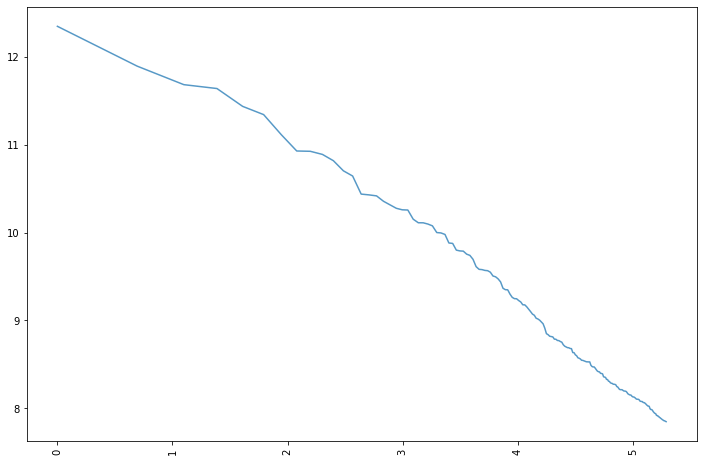

In [409]:
plt.rcParams["figure.figsize"] = [12, 8]
false_word = ['s','t','n']
ind = []
fre = []
fretwo = []
rnk = []
run = 1
for item in book_r_counter:
    if item[0] not in false_word:
        ind.append(item[0])
        fre.append(item[1])
        fretwo.append(math.log(item[1]))
        rnk.append(math.log(run))
        run = run + 1

#plt.bar(ind, fre, alpha = 1)
plt.xticks(rotation='vertical')
plt.plot(rnk, fretwo, alpha =  .75)

plt.yscale('linear')

plt.show()

In [394]:
column_name_list = ['book_name']
column_name_list.extend(list((range(1, 201))))
column_name_list = list((range(1, 201)))

In [395]:
log_name_list = []
for r in column_log_list:
    log_name_list.append(math.log(r))

In [396]:
word_df = pd.DataFrame(columns=column_name_list)

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200


In [397]:
word_df.loc[0,:] = log_name_list

In [436]:
count = 0
book_index = []
for b in book_word_d:
    if count < 50:
        word_rank = 0 
        #print(b)
        false_word = ['s','t','n']
        ind = []
        fre = []
        fretwo = []
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_word_d[b], '\w+')]
        if len(book_token_words) > 9999:
            book_index.append(b)
            book_token_counter = Counter(book_token_words).most_common(230)
            max_fre = 0
            #fretwo.append(b)
            for item in book_token_counter:
                if item[0] not in false_word:
                    if word_rank < 200:
                        ind.append(item[0])
                        fre.append(item[1])
                        fretwo.append(math.log(item[1]))
                        if (item[1]*run) > max_fre:
                            max_fre = item[1]*run
                        run = run + 1
                        word_rank = word_rank + 1
            #normlized_fre = [x / max_fre for x in fretwo]
            #word_df.iloc[count+1,0] = b
            word_df.loc[count+1,:] = fretwo
            count = count + 1
        word_df

In [437]:
word_df = word_df.apply(pd.to_numeric)

In [438]:
count = 0
for row in word_df.iterrows():
    if count != 0:
        theta = np.polyfit(word_df.loc[0,:], word_df.loc[count,:], 1)
        print("{} slope of {}".format(theta[0],book_index[count-1]))
    count = count + 1

-0.9426271066721666 slope of A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens
-0.9484776186649654 slope of A Tale of Two Cities by Charles Dickens
-0.9295088910531788 slope of Adventures of Huckleberry Finn by Mark Twain
-0.9232485481852148 slope of Anne of Green Gables by L. M.  Montgomery
-0.9587622675371498 slope of Anthem by Ayn Rand
-0.9466813986028007 slope of Dracula by Bram Stoker
-0.964631930759742 slope of Dubliners by James Joyce
-0.9648070323357345 slope of Emma by Jane Austen
-1.0341449745529023 slope of Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley
-0.9490104703661005 slope of Great Expectations by Charles Dickens
-0.9715981989376682 slope of Heart of Darkness by Joseph Conrad
-0.9912523789781899 slope of Jane Eyre_ An Autobiography by Charlotte Brontë
-1.0102126903572637 slope of Leviathan by Thomas Hobbes
-0.9133451862897726 slope of Little Women by Louisa May Alcott
-0.9626402958090434 slope of Metamorphosis by Fr

In [480]:
def create_book_dictionary(book_folder_name):
    glob_name = book_folder_name + '/*'
    books_in_folder = glob.glob(glob_name)
    book_path = book_folder_name + '\\'
    
    dict_name = {}
    all_book = ""
    book_name_start = len(book_path)
    
    for b in books_in_folder:
        book = b[book_name_start:]
        with open(book_path+book,encoding="utf8") as fi:
            book_r = fi.read()
        start_b = re.search(r"\*\*\*[^\*]+\*\*\*",book_r)
        end = start_b.end()
        try_book = book_r[end:]
        end_b = re.search(r"\*\*\*[^\*]+\*\*\*",try_book)
        cut_off = end_b.start()
        complete_b = try_book[:cut_off]
        c_book = complete_b.replace('\n', ' ')
        book_name = book[:-4]
        dict_name[book_name] = c_book
    return dict_name

In [508]:
def create_common_df(max_word_count, book_dictionary):
    column_name_list = list((range(1, max_word_count + 1)))
    
    log_name_list = []
    for r in column_log_list:
        log_name_list.append(math.log(r))
        
    cmn_word_df = pd.DataFrame(columns=column_name_list)
    cmn_word_df.loc[0,:] = log_name_list
    
    count = 0
    book_index = []
    for b in book_dictionary:
        word_rank = 0 
        false_word = ['s','t','n','5','10','15','20']
        ind = []
        fre = []
        fretwo = []
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_dictionary[b], '\w+')]
        if len(book_token_words) > 9999:
            book_index.append(b)
            book_token_counter = Counter(book_token_words).most_common(max_word_count+20)
            max_fre = 0
            for item in book_token_counter:
                if item[0] not in false_word:
                    if word_rank < max_word_count:
                        ind.append(item[0])
                        fre.append(item[1])
                        fretwo.append(math.log(item[1]))
                        if (item[1]*run) > max_fre:
                            max_fre = item[1]*run
                        run = run + 1
                        word_rank = word_rank + 1
            cmn_word_df.loc[count+1,:] = fretwo
            count = count + 1
            print(book_token_counter)
    return(cmn_word_df)

In [496]:
def pfit_slope(fit_df):
    form_fit_df = fit_df.apply(pd.to_numeric)
    count = 0
    for row in fit_df.iterrows():
        if count != 0:
            theta = np.polyfit(form_fit_df.loc[0,:], form_fit_df.loc[count,:], 1)
            print("{} slope".format(theta[0]))
        count = count + 1

In [497]:
e_book_d = create_book_dictionary('english_books')
e_book_df = create_common_df(200, e_book_d)
e_book_df.head()

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0.0,0.693147,1.098612,1.386294,1.609438,1.791759,1.94591,2.079442,2.197225,2.302585,...,5.252273,5.257495,5.26269,5.267858,5.273,5.278115,5.283204,5.288267,5.293305,5.298317
1,7.36074,6.966967,6.556778,6.520621,6.49224,6.300786,6.253829,6.200509,6.056784,6.040255,...,2.995732,2.995732,2.995732,2.995732,2.995732,2.995732,2.995732,2.995732,2.995732,2.944439
2,8.845489,8.355615,8.166216,7.995644,7.839526,7.700748,7.467942,7.443078,7.382124,7.3518,...,4.394449,4.394449,4.382027,4.369448,4.369448,4.369448,4.356709,4.343805,4.343805,4.317488
3,8.759826,8.499029,8.206584,8.070906,7.986845,7.844633,7.622664,7.520235,7.413367,7.30317,...,4.418841,4.406719,4.394449,4.394449,4.394449,4.382027,4.382027,4.369448,4.369448,4.343805
4,8.275122,8.130942,8.090709,8.021913,7.709308,7.649216,7.561122,7.436617,7.32449,7.299121,...,4.356709,4.343805,4.343805,4.343805,4.343805,4.330733,4.330733,4.317488,4.317488,4.304065


In [498]:
f_book_d = create_book_dictionary('french_books')
f_book_df = create_common_df(200, f_book_d)
pfit_slope(f_book_df)

-1.013980439379867 slope
-1.0319005234839493 slope
-0.9903976507490952 slope
-1.0440837829075733 slope
-1.06461480861168 slope
-1.0568455741137504 slope
-1.0349814961157628 slope
-0.9407743894739502 slope


In [503]:
g_book_d = create_book_dictionary('greek_books')
g_book_df = create_common_df(200, g_book_d)
pfit_slope(g_book_df)

-0.8992921525897906 slope
-0.927722890997626 slope


In [509]:
l_book_d = create_book_dictionary('latin_books')
l_book_df = create_common_df(200, l_book_d)
pfit_slope(l_book_df)
l_book_df.head()

[('et', 269), ('in', 260), ('non', 207), ('qui', 153), ('ad', 149), ('atque', 144), ('est', 139), ('esse', 137), ('cum', 132), ('ut', 127), ('si', 101), ('a', 98), ('quod', 98), ('ac', 93), ('quae', 90), ('iam', 84), ('sed', 82), ('me', 80), ('quam', 77), ('etiam', 69), ('de', 64), ('ex', 62), ('te', 61), ('ego', 61), ('mihi', 57), ('quid', 53), ('rei', 52), ('sunt', 51), ('publicae', 50), ('hoc', 47), ('aut', 47), ('se', 47), ('catilina', 43), ('quirites', 43), ('tam', 42), ('neque', 41), ('omnium', 38), ('publica', 37), ('id', 37), ('vero', 37), ('vobis', 37), ('enim', 35), ('ille', 35), ('ne', 34), ('rem', 33), ('quis', 33), ('re', 32), ('quem', 32), ('haec', 32), ('tamen', 32), ('modo', 32), ('urbe', 32), ('quo', 31), ('huius', 31), ('autem', 30), ('urbis', 30), ('catilinam', 28), ('c', 27), ('quos', 27), ('ita', 27), ('ea', 27), ('omnis', 26), ('tu', 26), ('omnes', 26), ('tum', 26), ('hanc', 26), ('l', 25), ('urbem', 25), ('civium', 25), ('quidem', 25), ('res', 24), ('nihil', 24),

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0.0,0.693147,1.098612,1.386294,1.609438,1.791759,1.94591,2.079442,2.197225,2.302585,...,5.252273,5.257495,5.26269,5.267858,5.273,5.278115,5.283204,5.288267,5.293305,5.298317
1,5.594711,5.560682,5.332719,5.030438,5.003946,4.969813,4.934474,4.919981,4.882802,4.844187,...,2.197225,2.197225,2.197225,2.197225,2.197225,2.197225,2.197225,2.197225,2.197225,2.197225
2,6.322565,5.209486,5.062595,5.056246,4.770685,4.762174,4.369448,4.290459,4.189655,4.189655,...,1.94591,1.94591,1.94591,1.94591,1.94591,1.94591,1.94591,1.94591,1.94591,1.94591
3,7.673223,6.634633,5.872118,5.805135,5.771441,5.690359,5.63479,5.480639,5.480639,5.476464,...,3.555348,3.555348,3.555348,3.555348,3.555348,3.526361,3.526361,3.526361,3.526361,3.526361


In [500]:
le_book_d = create_book_dictionary('latin_english_books')
le_book_df = create_common_df(200, le_book_d)
pfit_slope(le_book_df)
le_book_df.head()

-0.9319027017361985 slope
-0.8726847775550818 slope


,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0.0,0.693147,1.098612,1.386294,1.609438,1.791759,1.94591,2.079442,2.197225,2.302585,...,5.252273,5.257495,5.26269,5.267858,5.273,5.278115,5.283204,5.288267,5.293305,5.298317
1,7.426549,6.793466,6.530878,5.768321,5.556828,5.505332,5.241747,5.117994,5.09375,5.023881,...,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585,2.302585
2,8.910586,8.51198,7.741099,7.47817,7.351158,7.347944,7.33106,7.124478,6.767343,6.651572,...,4.143135,4.143135,4.127134,4.127134,4.110874,4.110874,4.110874,4.110874,4.110874,4.110874


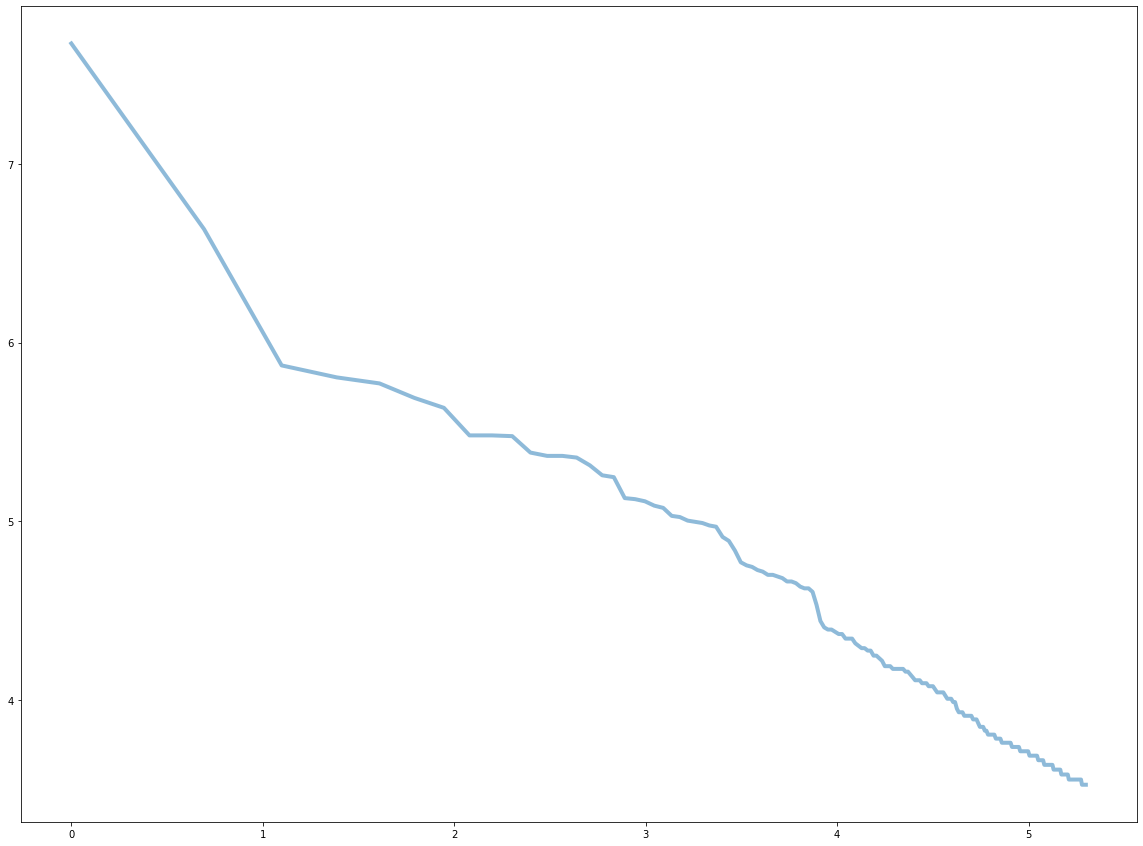

In [487]:
plt.rcParams["figure.figsize"] = [20, 15]
count = 0
for row in l_book_df.iterrows():
    if count != 0:
        plt.plot(l_book_df.loc[0,:], l_book_df.loc[count,:], alpha=.5, linewidth='4')
    count = count + 1

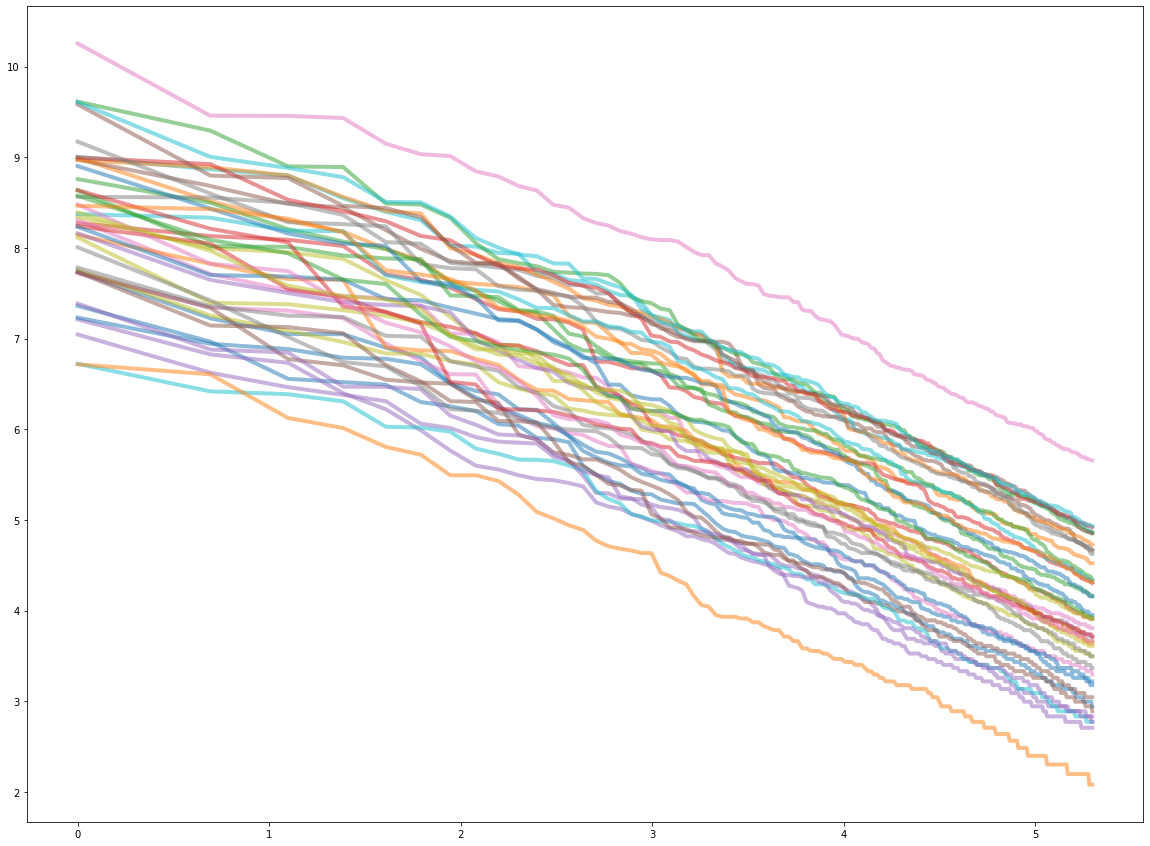

In [485]:
plt.rcParams["figure.figsize"] = [20, 15]
count = 0
for row in word_df.iterrows():
    if count != 0:
        plt.plot(word_df.loc[0,:], word_df.loc[count,:], alpha=.5, linewidth='4')
    count = count + 1

A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens


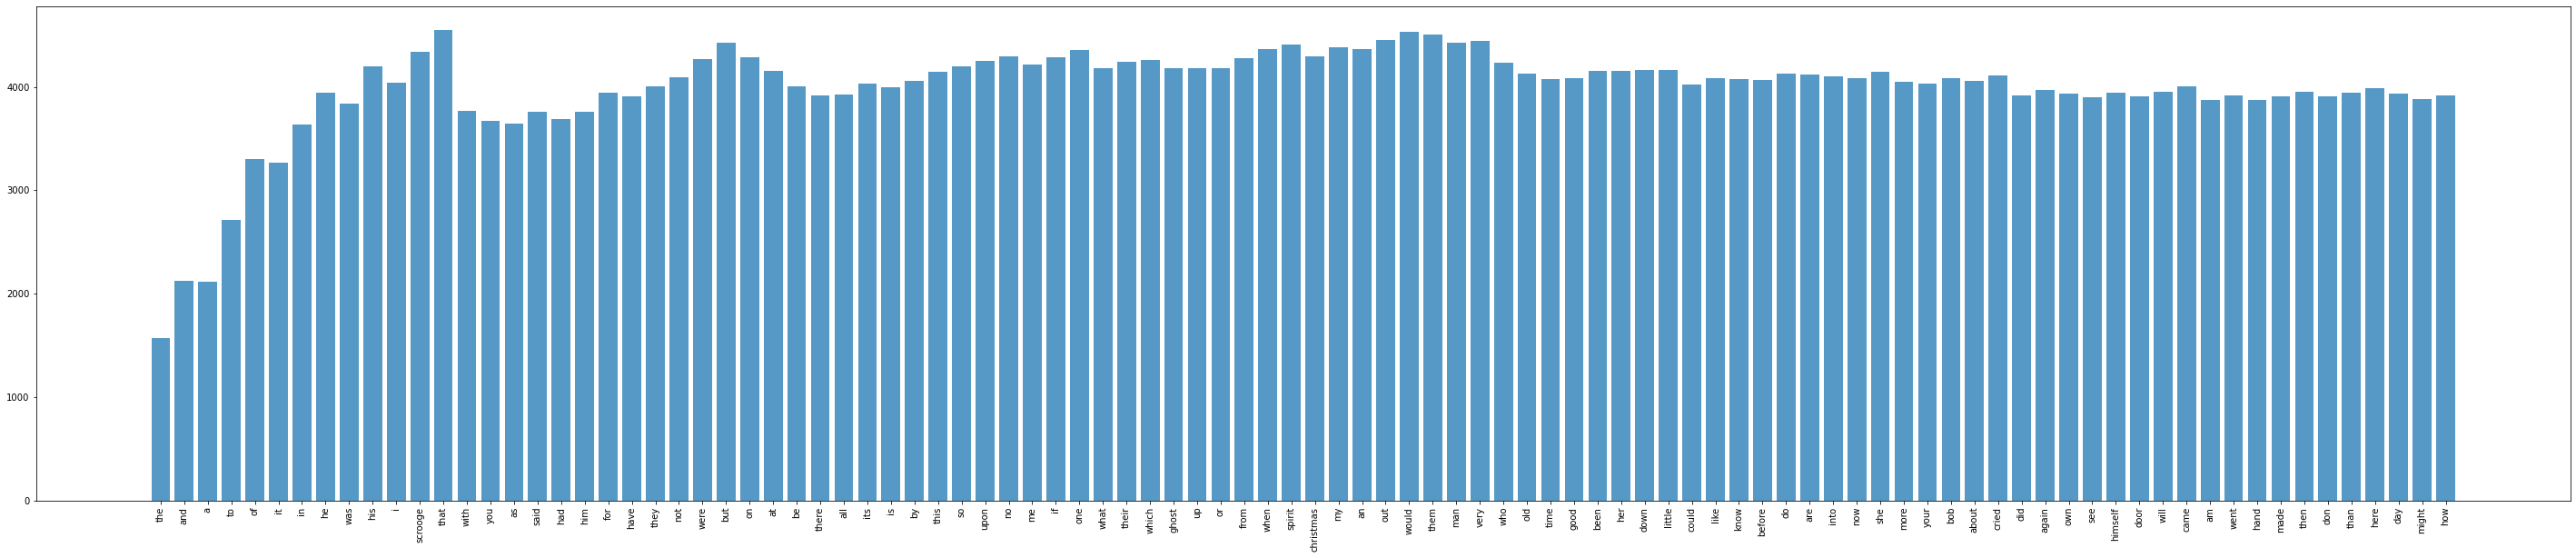

A Modest Proposal by Jonathan Swift


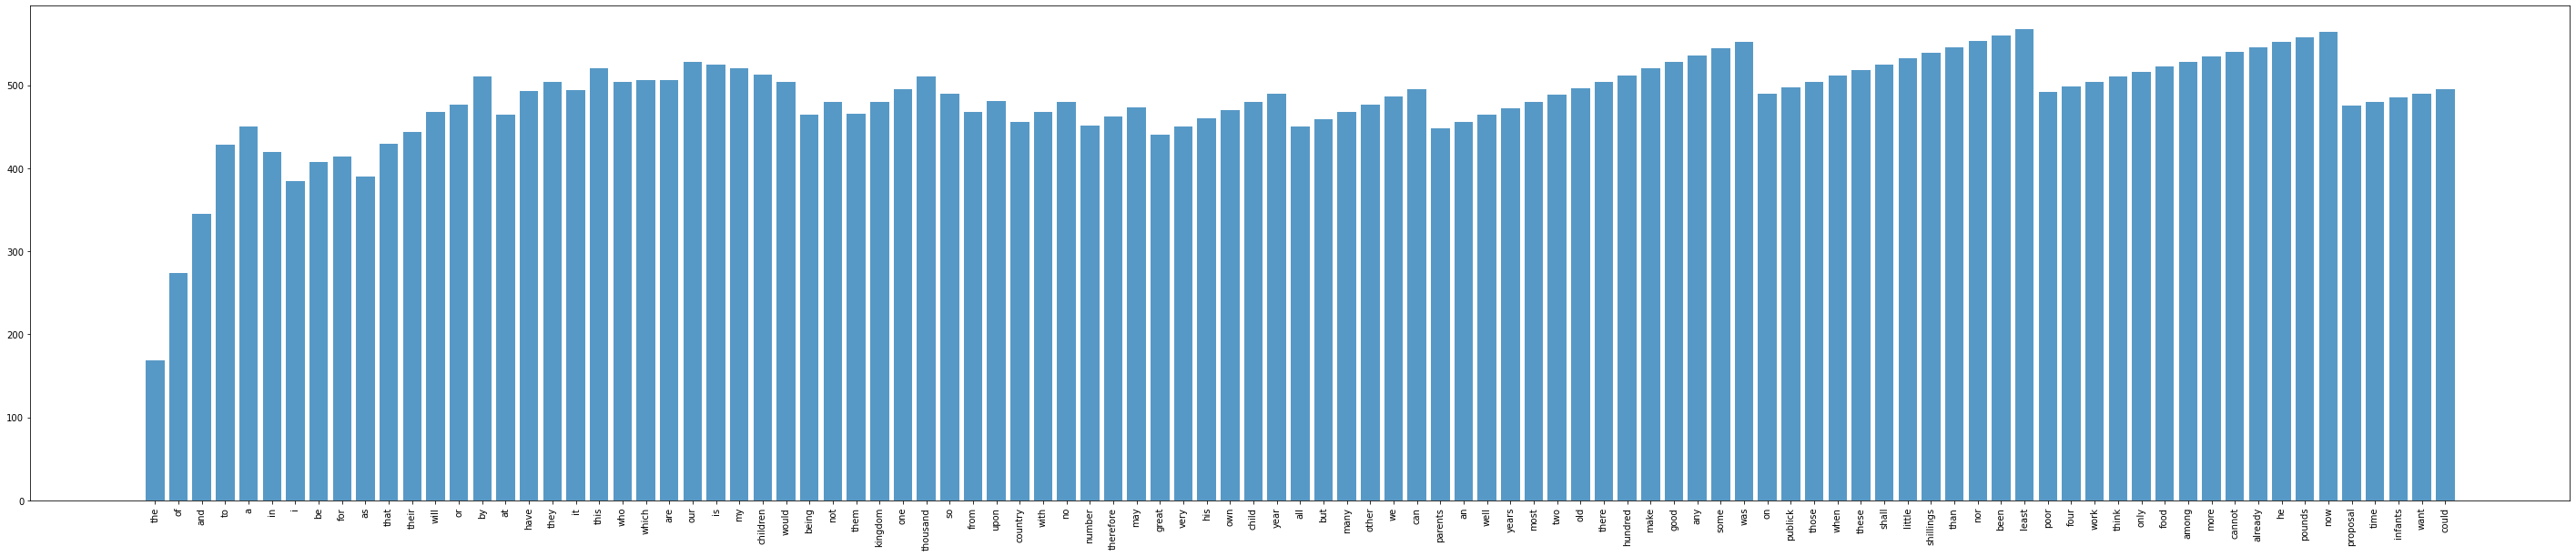

A Tale of Two Cities by Charles Dickens


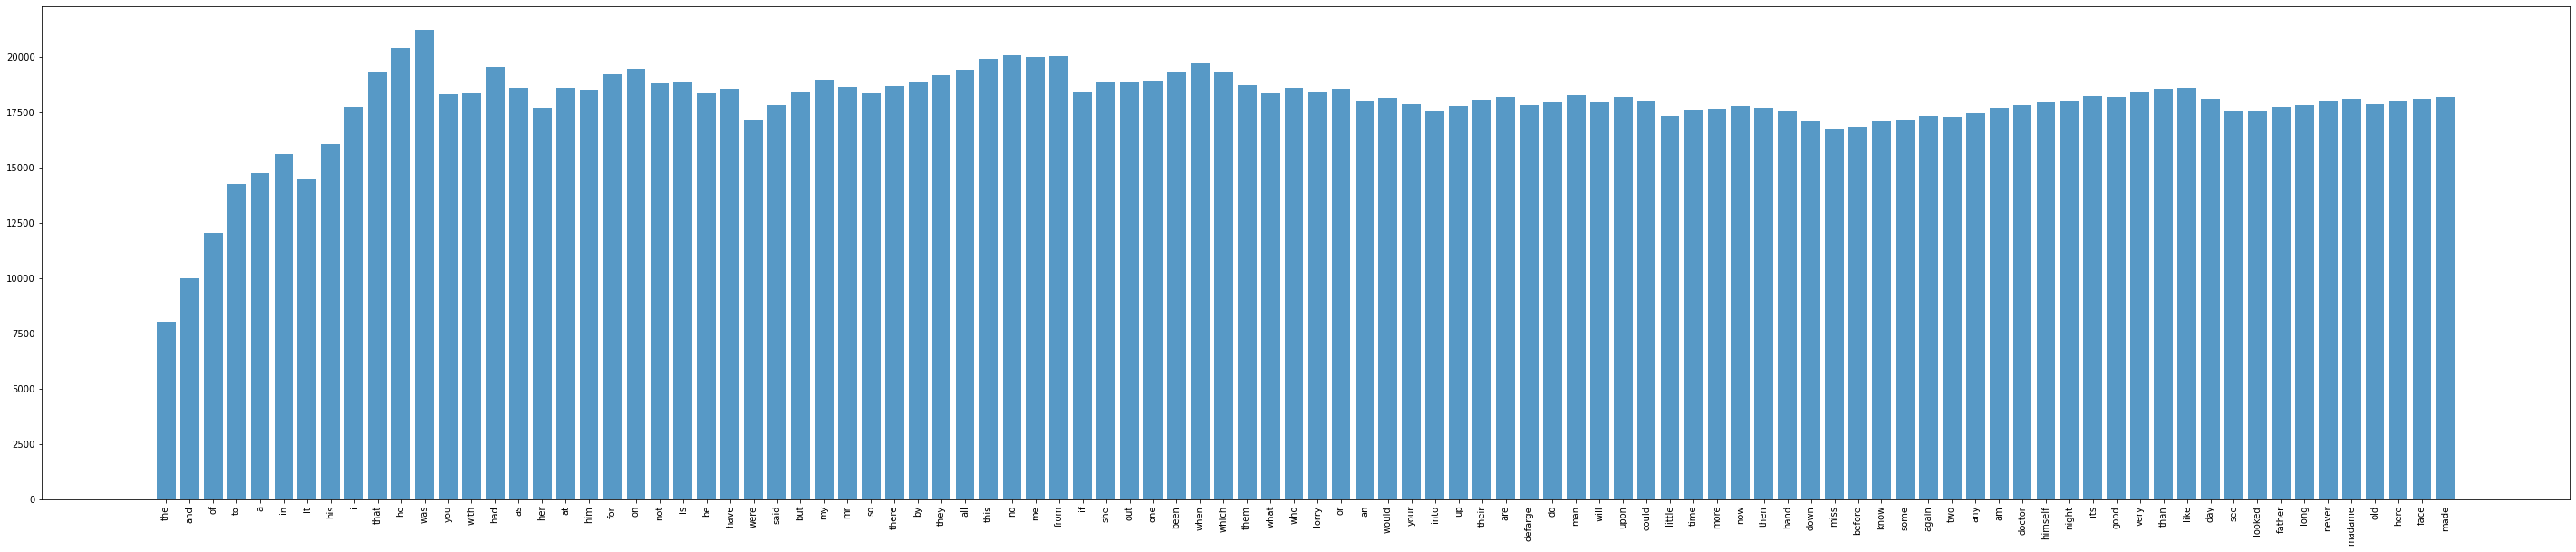

Adventures of Huckleberry Finn by Mark Twain


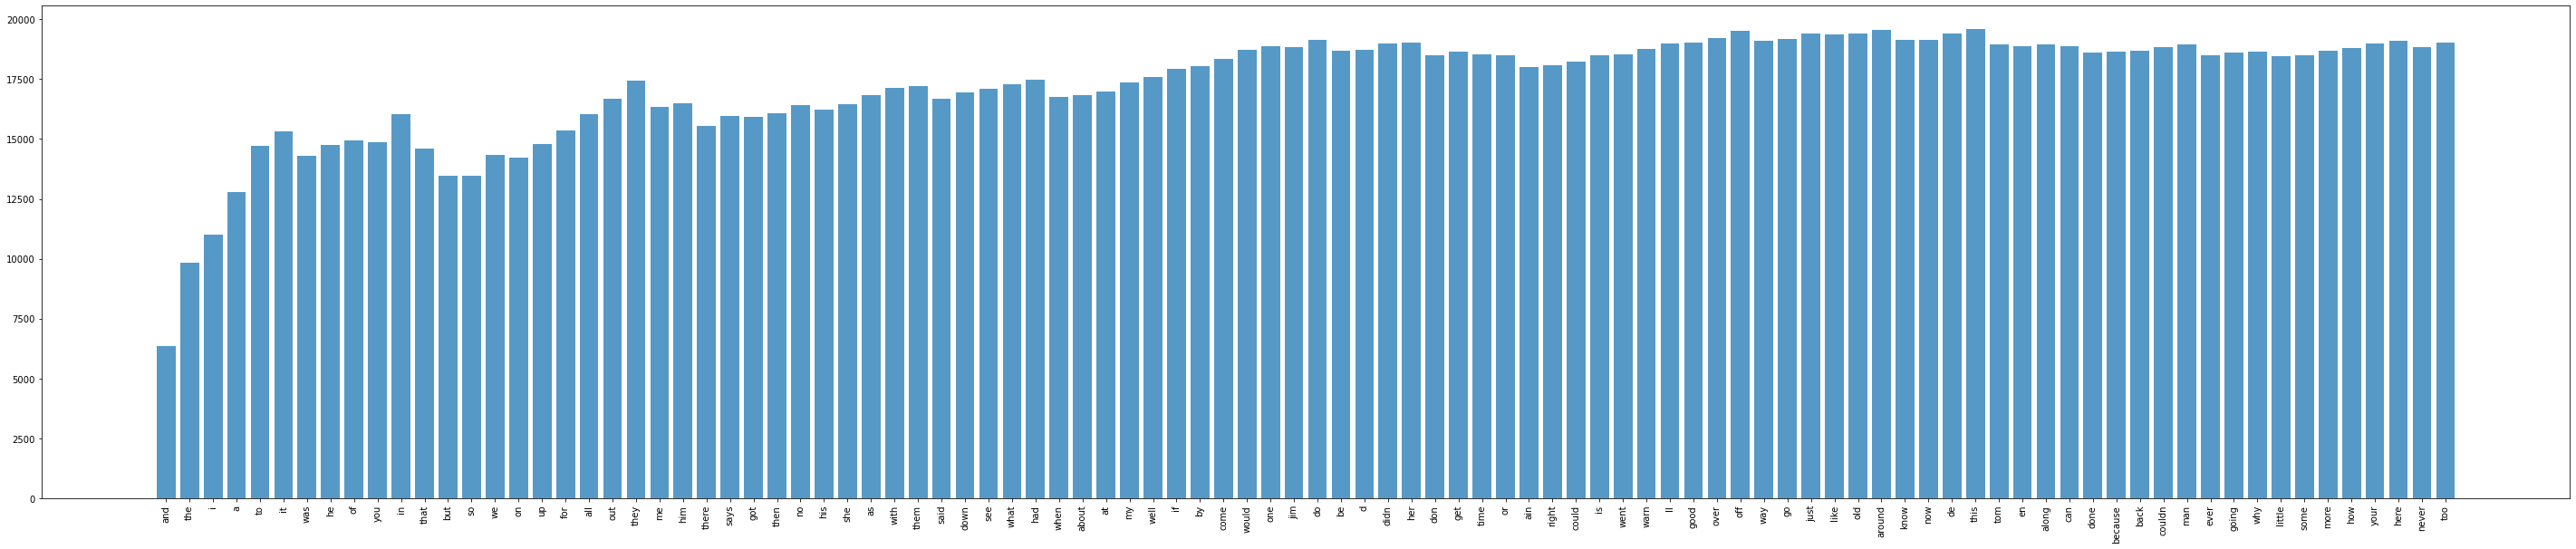

Anne of Green Gables by L. M.  Montgomery


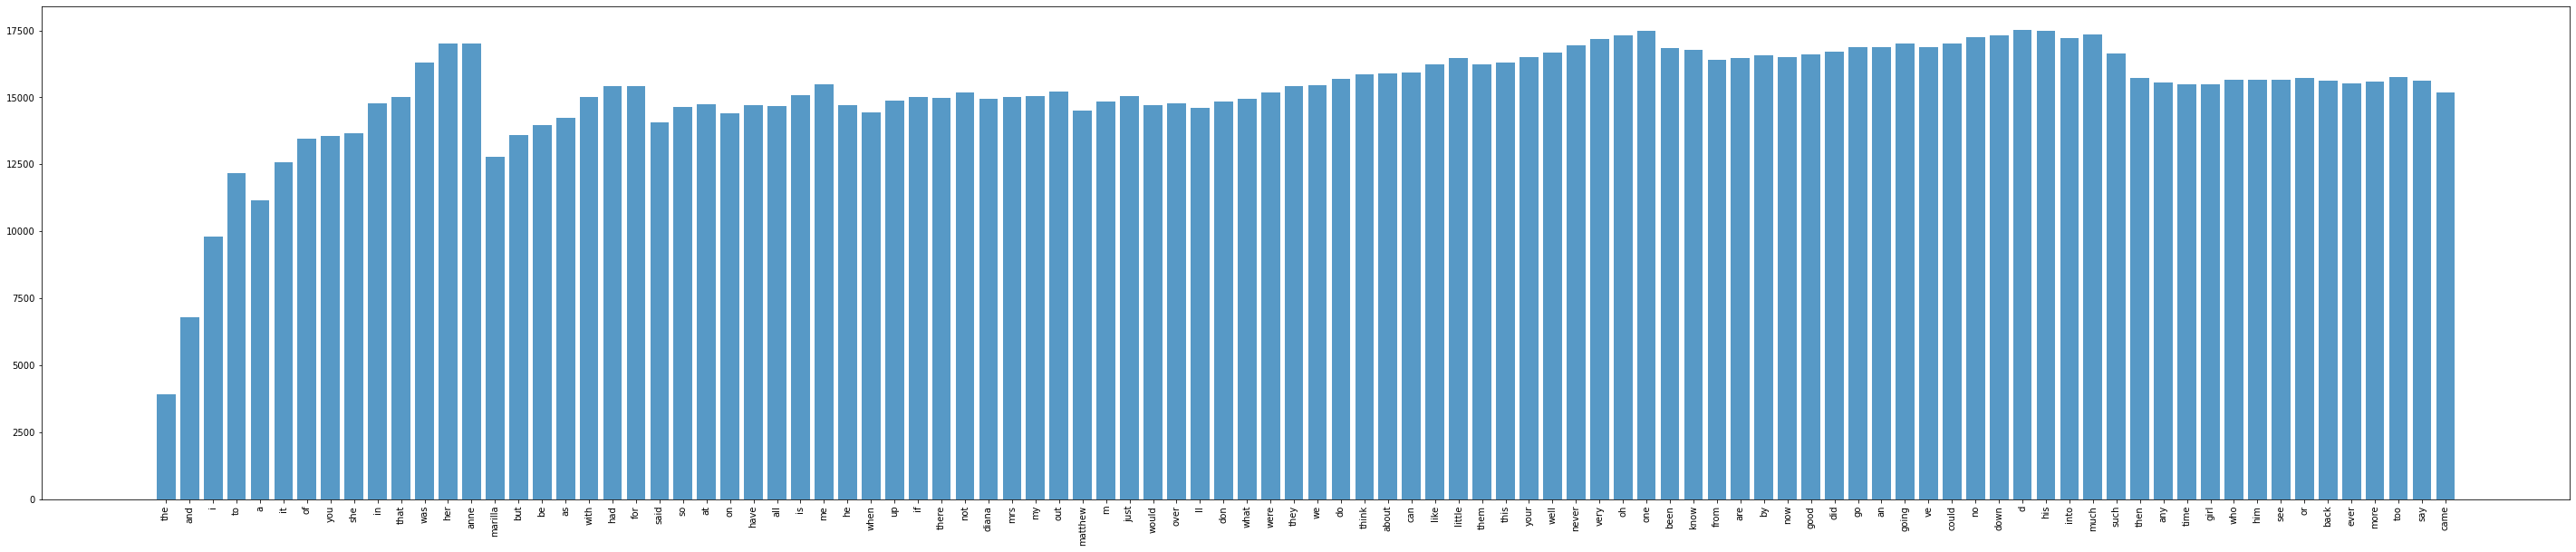

Anthem by Ayn Rand


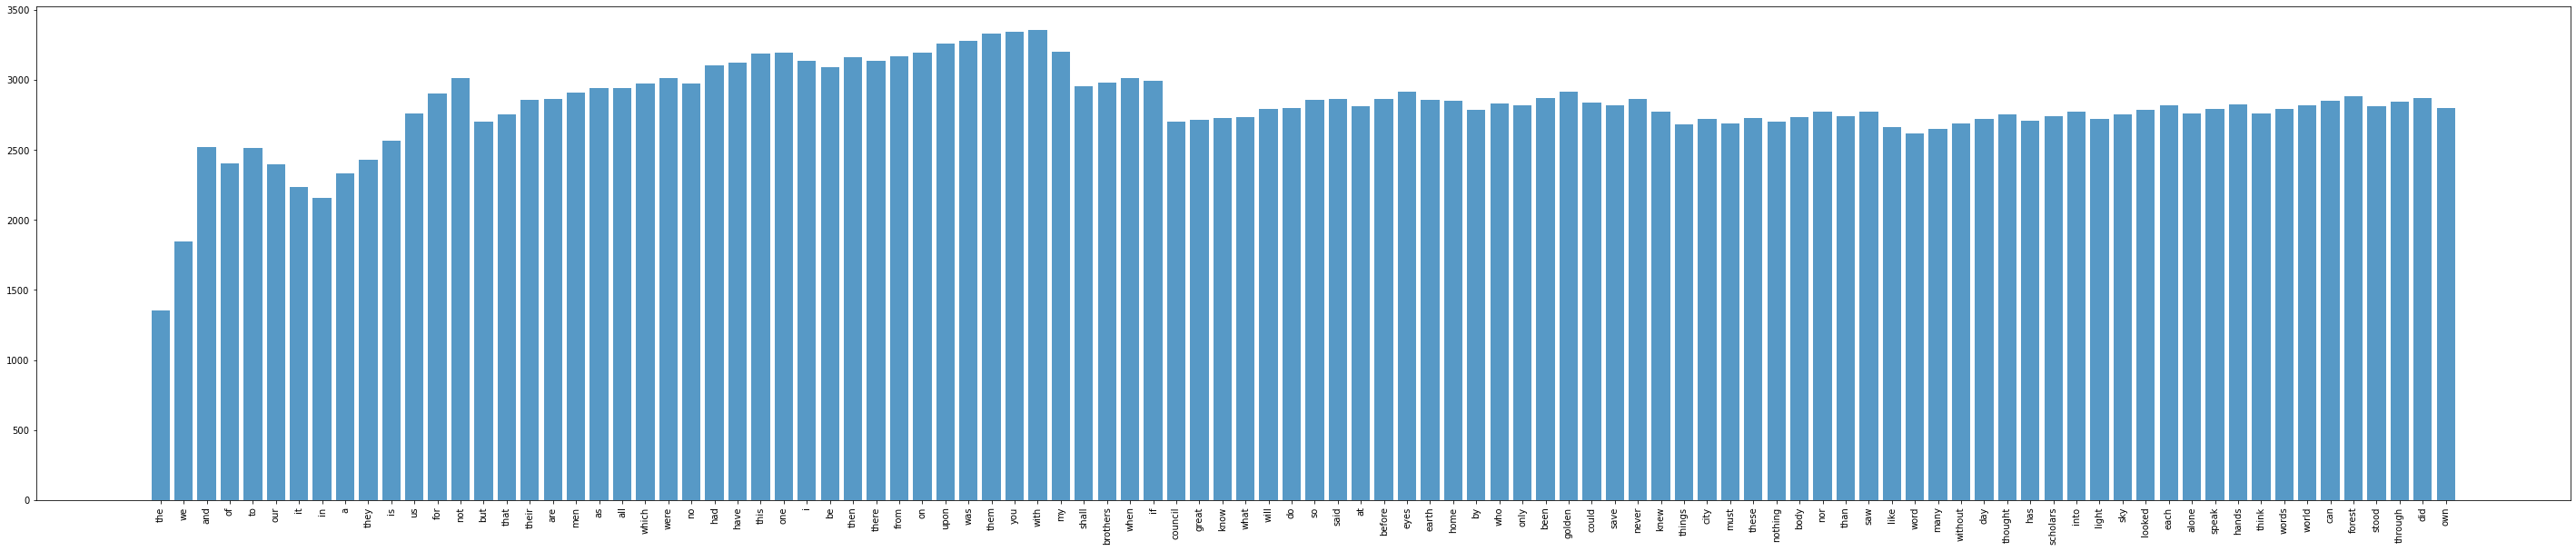

Dracula by Bram Stoker


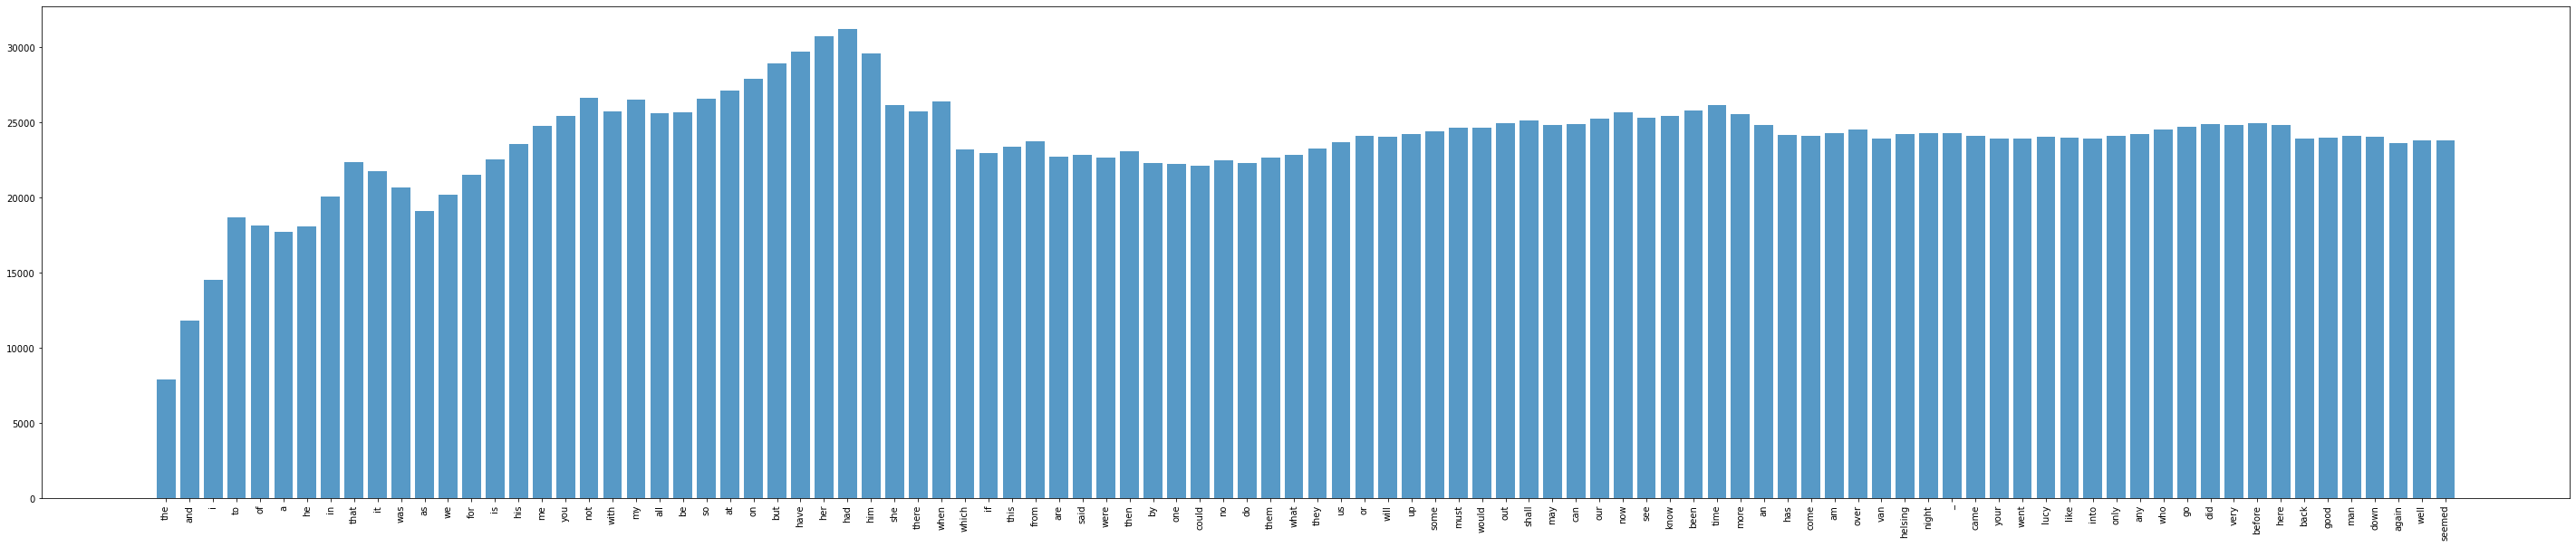

Dubliners by James Joyce


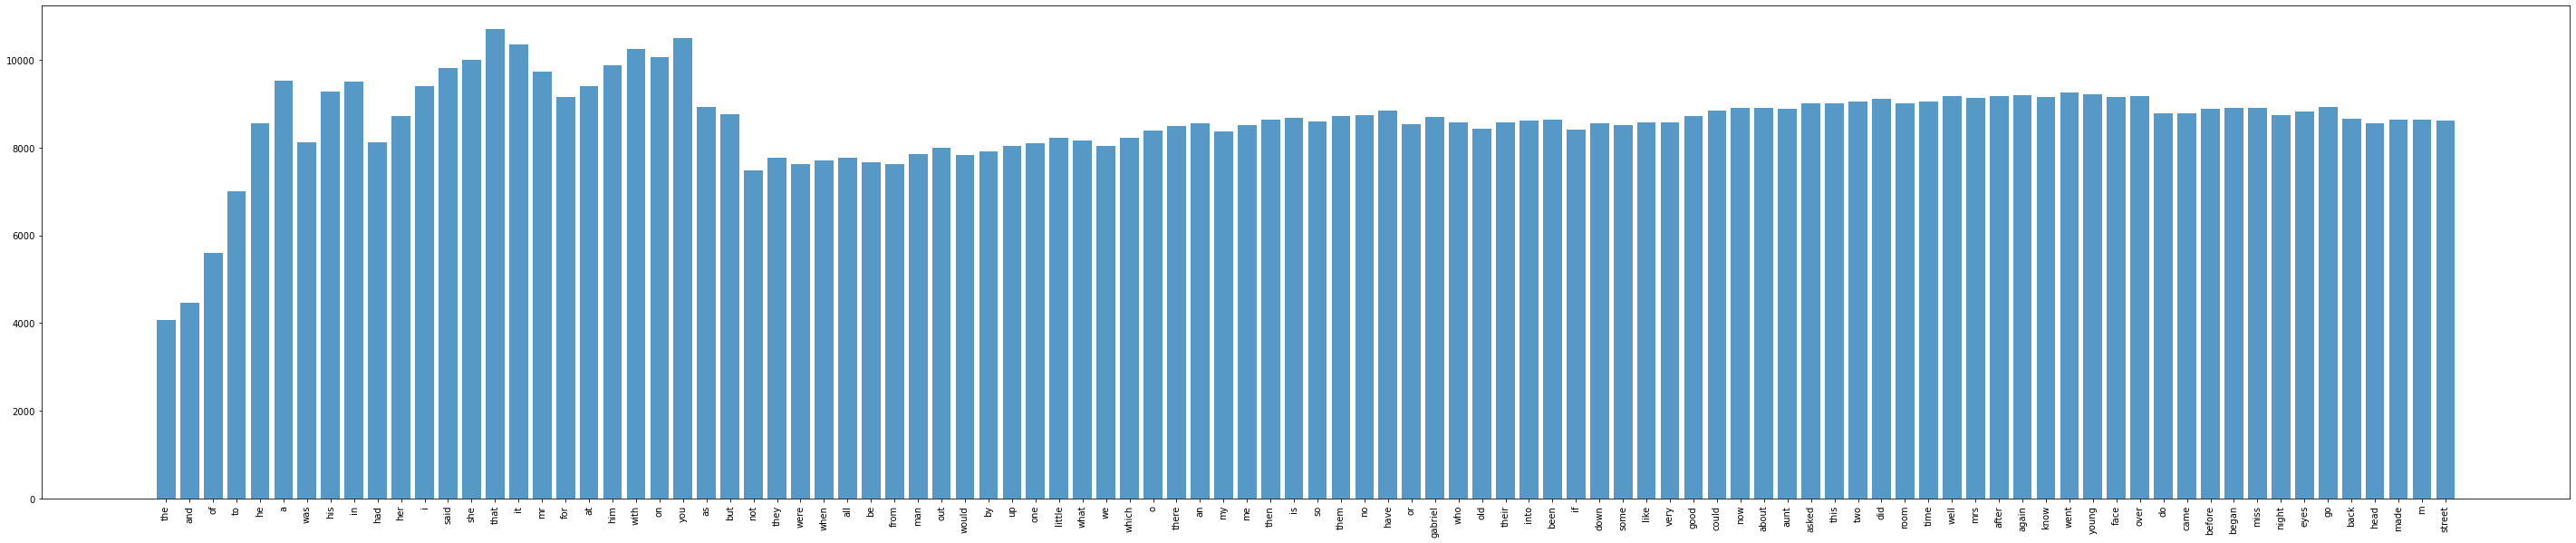

Emma by Jane Austen


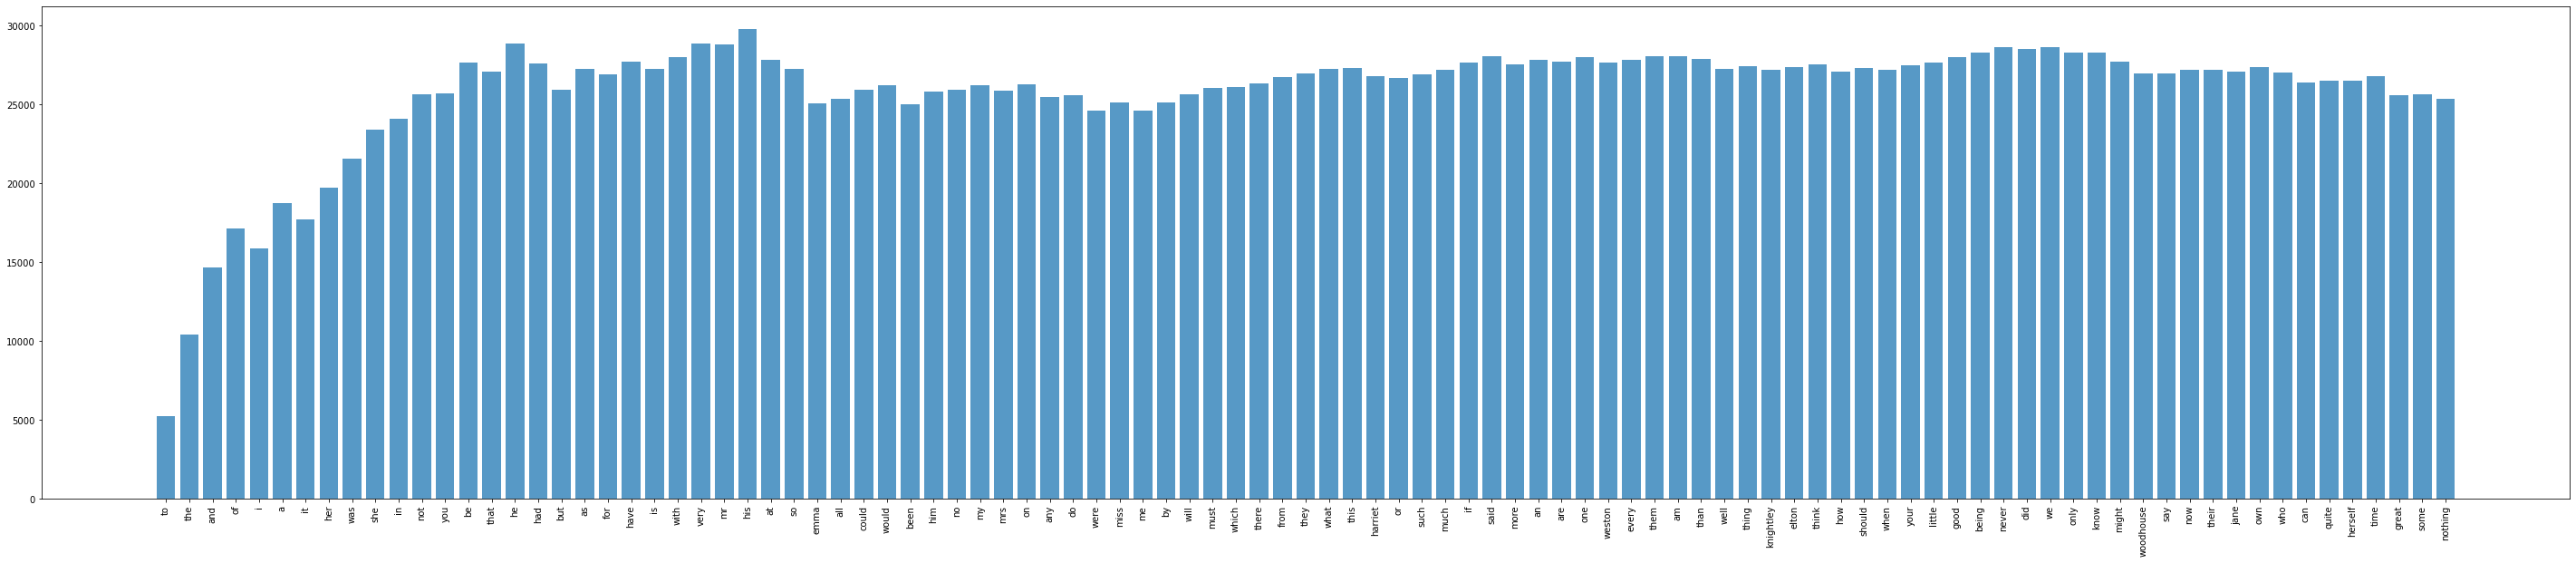

Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley


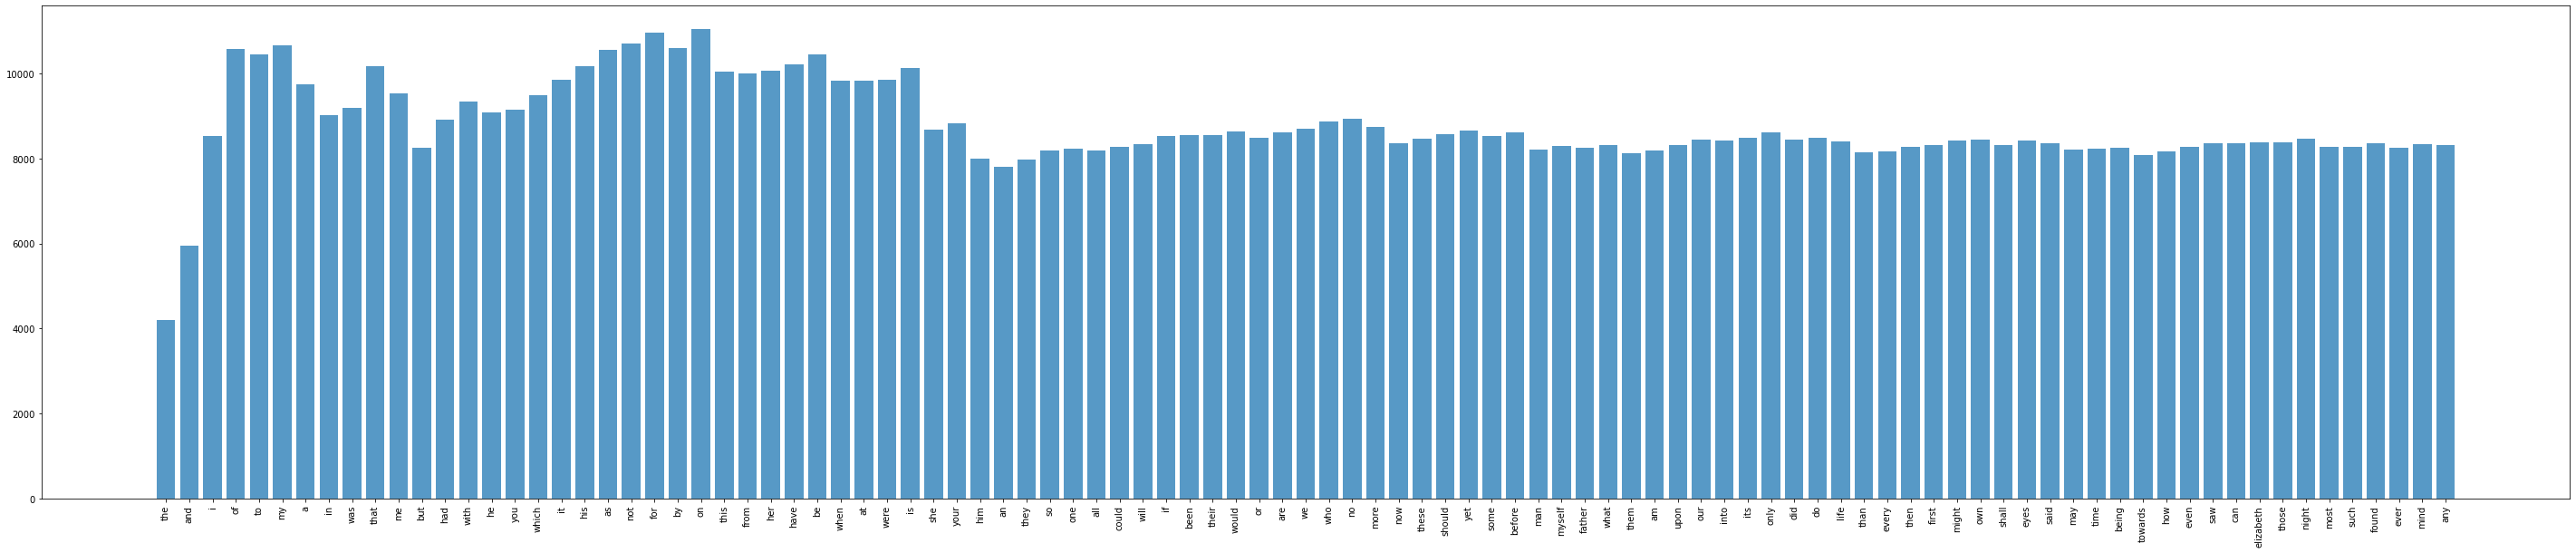

In [263]:
count = 0

for b in book_word_d:
    if count < 10:
        print(b)
        count = count + 1
        false_word = ['s','t','n']
        ind = []
        fre = []
        fretwo = []
        run = 1
        book_token_words = [x.lower() for x in regexp_tokenize(book_word_d[b], '\w+')]
        book_token_counter = Counter(book_token_words).most_common(100)
        for item in book_token_counter:
            if item[0] not in false_word:
                ind.append(item[0])
                fre.append(item[1])
                fretwo.append(item[1]*run)
                run = run + 1
        plt.bar(ind, fretwo, alpha =  .75)
        plt.xticks(rotation='vertical')
        plt.show()

In [153]:
for x in book_r_counter:
    print(x)

('the', 394701)
('and', 251180)
('of', 200453)
('to', 193529)
('a', 145177)
('i', 118866)
('in', 115758)
('he', 102809)
('that', 97177)
('it', 87001)
('was', 80659)
('his', 76135)
('you', 69208)
('with', 59688)
('for', 56137)
('is', 54939)
('as', 54727)
('not', 51171)
('had', 50623)
('her', 48714)
('but', 47999)
('at', 44906)
('s', 42300)
('him', 41997)
('on', 41988)
('be', 41307)
('she', 39169)
('have', 35562)
('all', 34712)
('my', 34314)
('by', 32147)
('me', 32146)
('they', 31310)
('said', 30215)
('this', 30048)
('which', 29939)
('so', 29148)
('from', 28542)
('one', 25697)
('what', 25056)
('there', 24421)
('or', 24362)
('were', 23358)
('are', 23094)
('no', 22976)
('we', 20987)
('if', 20902)
('when', 20570)
('them', 20510)
('who', 19886)
